# OKCupid Date a Scientist - Part 1 Zodiac Sign Prediction
Given clients' dataset of OKcupid - a dating company, this project's objective is to cluster these clients into groups and try to match a couple. There is only one data file which is 'profile.csv'. The dataset consists of 31 columns which are about clients. All columns are as follows:
 - **age** numeric variable of ages of users
 - **body_type** nominal categorical variable of users' body shapes such as average, thin, a little extra, etc.
 - **diet** categorical variable of users' kinds of foods they have such as anything, vegetarian, vegan, halal, etc.
 - **drinks** categorical variable that shows how often a user drink
 - **drugs** categorical variable that shows how often a user take in  drugs        
 - **education** categorical variable of users' highest education       
 - **essay0 - essay9** These ten columns provide short answers of questions below by user
    - **essay0** My self summary
    - **essay1** What I’m doing with my life
    - **essay2** I’m really good at
    - **essay3** The first thing people usually notice about me
    - **essay4** Favorite books, movies, show, music, and food
    - **essay5** The six things I could never do without
    - **essay6** I spend a lot of time thinking about
    - **essay7** On a typical Friday night I am
    - **essay8** The most private thing I am willing to admit
    - **essay9** You should message me if…
 - **height** numeric variable of users' height in inches           
 - **income** numeric variable of users' income   
 - **job**  categorical variable of user's job       
 - **last_online** date and time when a user is last online
 - **location** categorical variable of the area in which a user lives in         
 - **offspring** categorical variable that shows kids' status of a user and their thoughts about having more kids.      
 - **orientation** categorical variable of user's gender orientation e.g. straight, gay, bisexual      
 - **pets** categorical variable that shows pets' status of a user and their thoughts about petting animal.         
 - **religion** categorical variable of user's religion      
 - **sex** categorical variable of user's sex including 'm' for male and 'f' for female.           
 - **sign** categorical varaible of user's zodiac signs such as aries, taurus, gemini    
 - **smokes** categorical variable of how often a user smokes         
 - **speaks** a short answer of user's languages 
 - **status** categorical variable of member's status such as single, available, married

In [1]:
# import necessary libraries and change some display settings.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# set the settings for all figures
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (8, 6)


# Import data

In [2]:
# import dataset from a csv file
df = pd.read_csv("profiles.csv")

# Goals
Some users believe that zodiac signs may be a good signal to indicate whether they can get along with another user given zodiac sign. However, some users do not mind about identifying their signs in their profiles. The initial goal of this project is to create a model that can predict signs for users who do not inform them. On the one hand, this project also aims at try matching a couple which are the most similar to a user.

# Exploratory Data Analysis and Cleaning Data 

In [3]:
# check the dataset sizes
df.shape

(59946, 31)

In [4]:
# check all columns' names, their values' types and number of non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
# have a look at the first ten rows of data
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake myself a little better everyday, in some productively lazy\nway. got tired of tying my shoes. considered hiring a five year\nold, but would probably have to tie both of our shoes... decided to\nonly wear leather shoes dress shoes.<br />\n<br />\nabout you:<br />\n<br />\nyou love to have really serious, really deep conversations about\nreally silly stuff. you have to be willing to snap me out of a\nlight hearted rant with a kiss. you don't have to be funny, but you\nhave to be able to make me laugh. you should be able to bend spoons\nwith your mind, and telepathically make me smile while i am still\nat work. you should love life, and be cool with just letting the\nwind blow. extra points for reading all this and guessing my\nfavorite video game (no hints given yet). and lastly you have a\ngood attention span.","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the producers, down periscope.<br />\n<br />\nshows:<br />\nthe borgia, arrested development, game of thrones, monty\npython<br />\n<br />\nmusic:<br />\naesop rock, hail mary mallon, george thorogood and the delaware\ndestroyers, felt<br />\n<br />\nfood:<br />\ni'm down for anything.",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad for\nme.<br />\n4. i love being around people that resemble line 1-3.<br />\ni love the outdoors and i am an avid skier. if its snowing i will\nbe in tahoe at the very least. i am a very confident and friendly.\ni'm not interested in acting or being a typical guy. i have no time\nor patience for rediculous acts of territorial pissing. overall i\nam a very likable easygoing individual. i am very adventurous and\nalways looking forward to doing new things and hopefully sha

In [6]:
# create a dataframe with numeric features
num_features = df.select_dtypes('number')

# see descriptive statistics
num_features.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


OKCupid's member were between 18-110 years old. However, half of them aged between 26-37. The height (inches) ranged from 1 to 95 inches and income started from -1 to 1 million dollars. There was some anomalies as height should not be as low as 1 inch and income should not be negative values.

In [7]:
# create a dataframe with non-numeric columns
cat_features = df.select_dtypes('object')
cat_features.describe()

,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,54650,35551,56961,45866,53318,54458,52374,50308,48470,49409,49096,46175,47495,40721,47343,54266,51748,59946,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,12,18,6,3,32,54350,51516,48635,43533,49260,48963,43603,45554,39324,45443,217,21,30123,199,15,3,15,45,2,48,5,7647,5
top,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,ask me,my family,my future,out with friends,ask me,you want to.,white,other,2012-06-29-22-56,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,14652,16585,41780,37724,23959,12,61,82,529,16,6,161,89,45,199,32831,7589,24,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697


In [8]:
# to check the number of missing values in each column
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

## Age

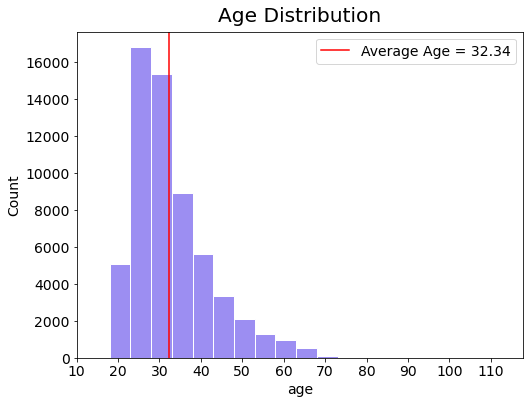

In [9]:
# find the mean of ages
avg_age = np.mean(df.age)

# create a historam of ages
sns.histplot(data =df, x='age', color='mediumslateblue', binwidth=5, edgecolor='white')
plt.axvline(avg_age, color ='red', label='Average Age = ' + str(round(avg_age,2)))
plt.title("Age Distribution", fontsize='x-large', pad=10)
plt.xticks(range(10,120,10))
plt.legend()
plt.show()

The average age of users is around 32 years old. The outliers are above 70 years old.

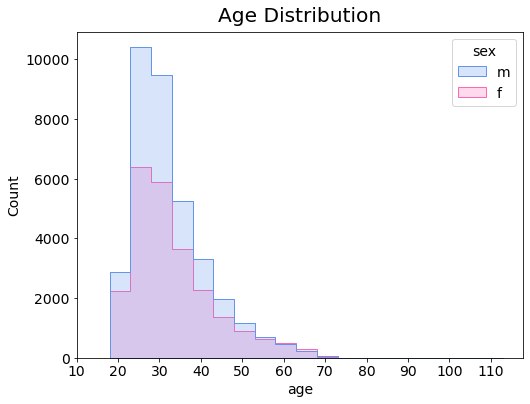

In [10]:
sns.histplot(data =df, x='age', hue='sex', element='step', binwidth=5, hue_order=['m', 'f'], palette=['cornflowerblue', 'hotpink'])
plt.title("Age Distribution", fontsize='x-large', pad=10)
plt.xticks(range(10,120,10))
plt.show()

Male users and female users had similar distribution. The majorities of both sexes ranged from 18 to just over 70 years old.  However, the difference is that there was a smaller number of female users than male users.

## Income


In [11]:
# to count each value in the column 'income'
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

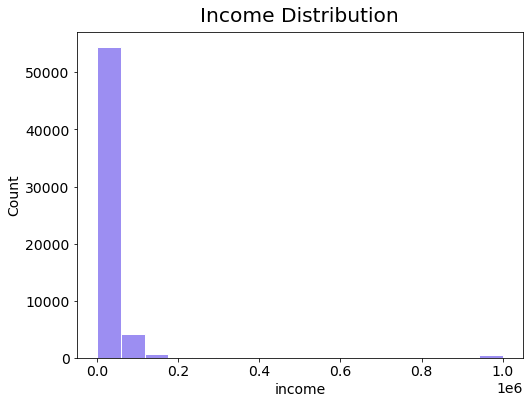

In [12]:
sns.histplot(data =df, x='income', color='mediumslateblue', edgecolor='white')
plt.title("Income Distribution", fontsize='x-large', pad=10)
plt.show()

Regarding values counts, most users did not provide their income.

# Nominal Categorical Data


## Body Type

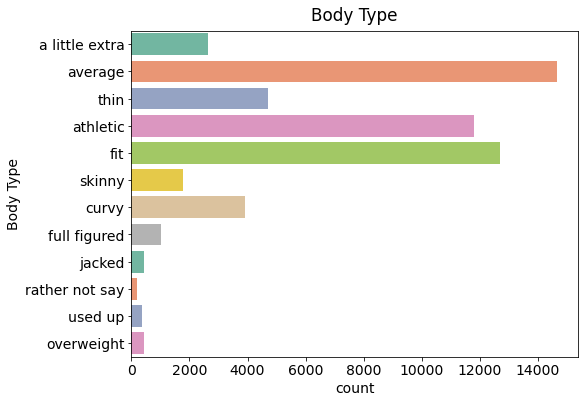

In [13]:
sns.countplot(data = df, y = 'body_type', palette = 'Set2')
plt.title("Body Type", pad=10)
plt.ylabel("Body Type")
plt.show()

## Diet

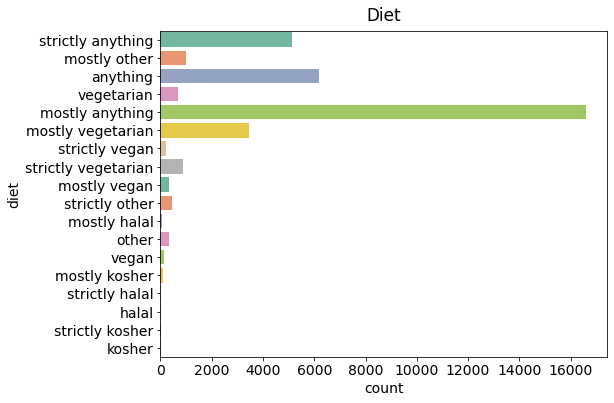

In [14]:
sns.countplot(data = df, y = 'diet', palette = 'Set2')
plt.title("Diet", pad=10)
plt.show()

## Drinks

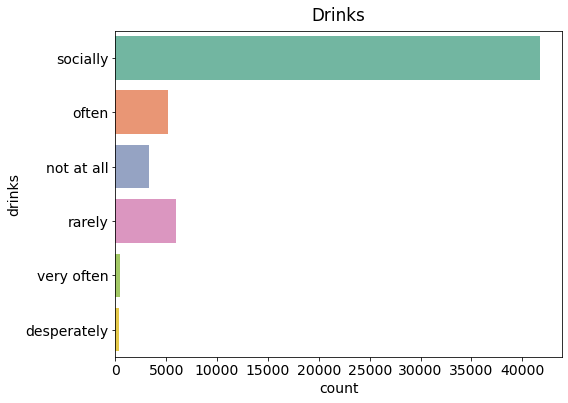

In [15]:
sns.countplot(data = df, y = 'drinks', palette = 'Set2')
plt.title("Drinks", pad=10)
plt.show()

## Drugs

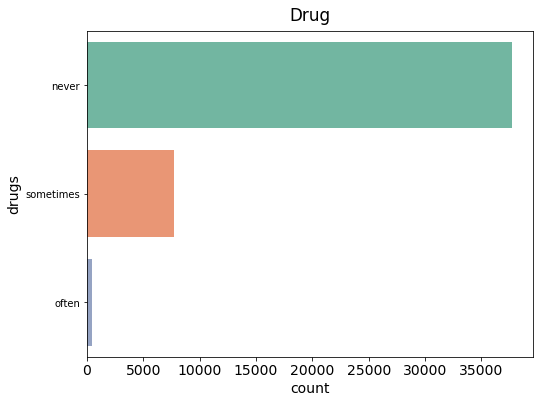

In [16]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'drugs', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Drug", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Education

In [17]:
# check a number of unique education
df.education.nunique()

32

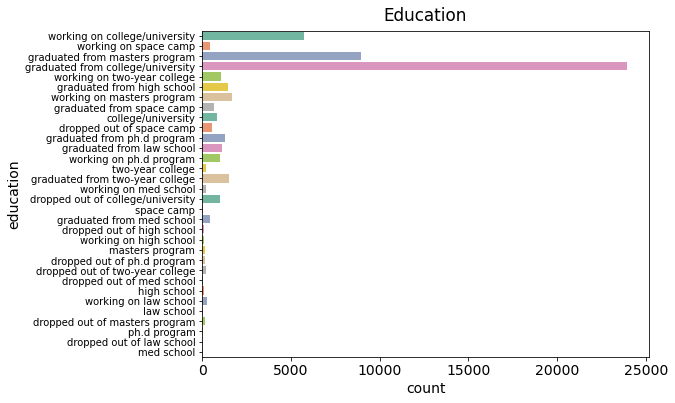

In [18]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'education', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Education", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Ethnicity

In [19]:
# count  a number of each unique ethnicity
ethnicity_counts = df.groupby('ethnicity').status.count()

# sort values by the number of count
ethnicity_counts = ethnicity_counts.sort_values(ascending=False).reset_index(name='counts')

ethnicity_counts

,ethnicity,counts
0,white,32831
1,asian,6134
2,hispanic / latin,2823
3,black,2008
4,other,1706
5,"hispanic / latin, white",1301
6,indian,1077
7,"asian, white",811
8,"white, other",641
9,pacific islander,432


Most of users are white. However, more than one ethnicity can be applied to one user. Some people might do not honestly tell what ethnicity they are as there are people being both white and black or both hispanic/latin and native american, and so on. 

## Job

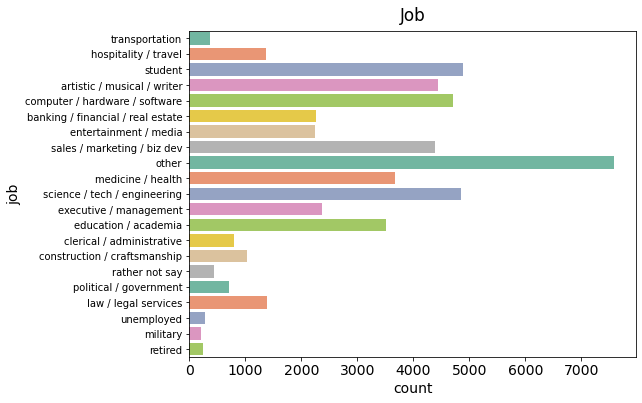

In [20]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'job', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Job", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Offspring

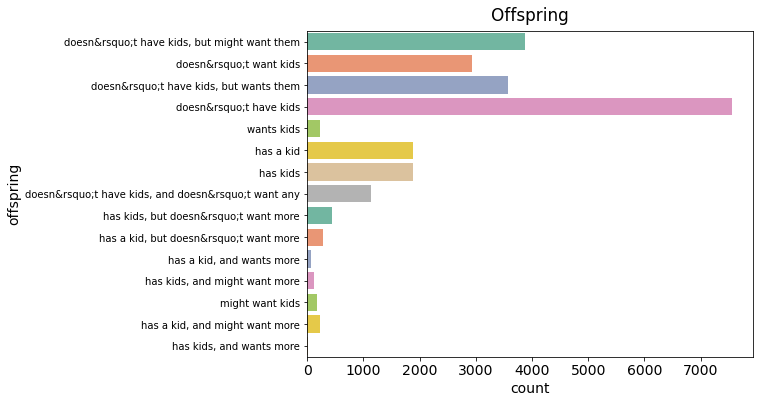

In [21]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'offspring', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Offspring", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Orientation

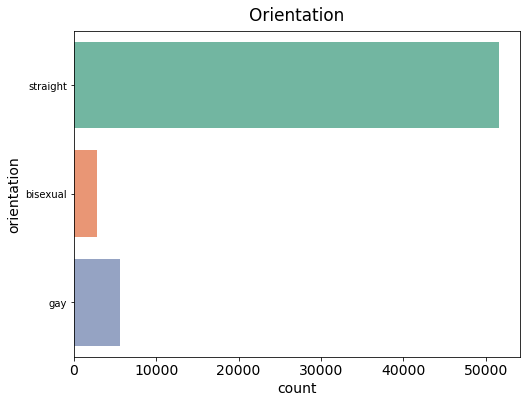

In [22]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'orientation', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Orientation", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

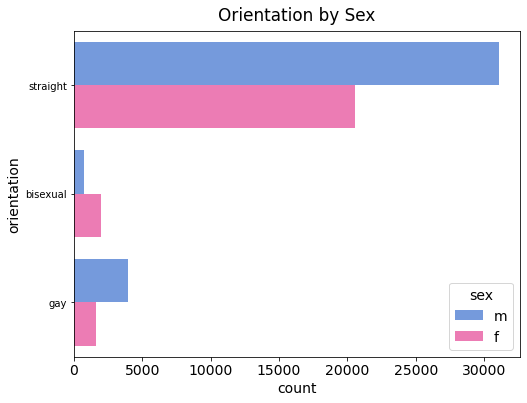

In [23]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'orientation', hue='sex', palette = ['cornflowerblue', 'hotpink'])
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Orientation by Sex", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Pets

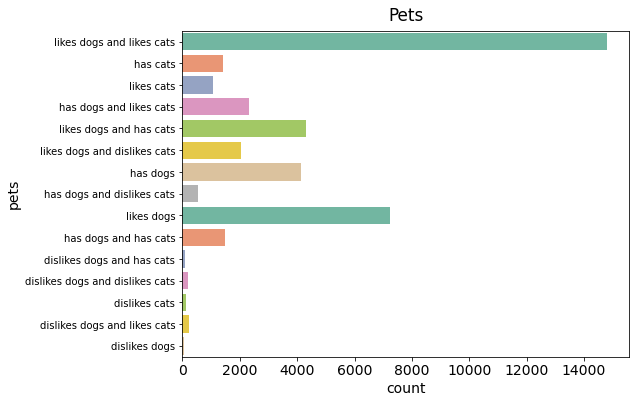

In [24]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'pets', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Pets", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Religion

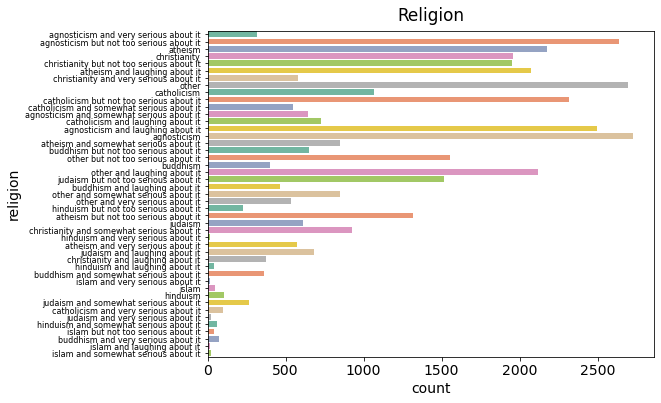

In [25]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'religion', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Religion", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=8)
plt.show()

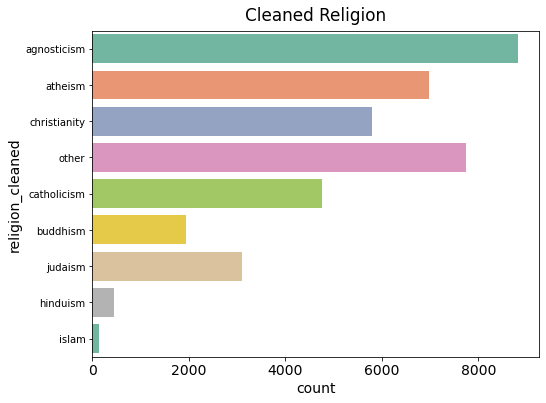

In [26]:
df['religion_cleaned'] = df.religion.str.split().str.get(0)
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'religion_cleaned', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Cleaned Religion", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Sign

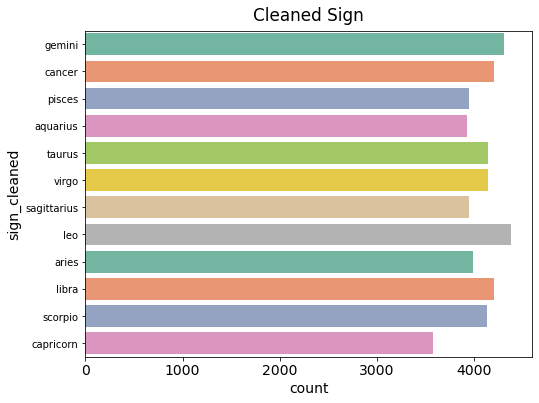

In [27]:
df['sign_cleaned'] = df.sign.str.split().str.get(0)
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'sign_cleaned', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Cleaned Sign", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

## Smokes

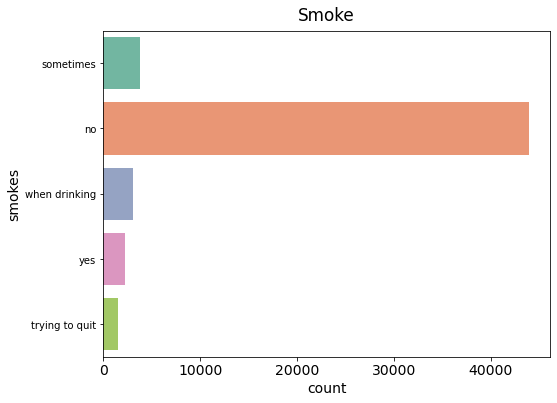

In [28]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, y = 'smokes', palette = 'Set2')
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_title("Smoke", pad=10)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, fontsize=10)
plt.show()

# Part 1 - Machine Learning Model
In order to create a model that predict a zodiac sign for a user, only some features are used to create model. As it is  a multi-classification, two machine learning models were chosen.
  - **K Nearest Neighbors Classifier**
  - **Random Forest Classifier**

## Import Libraries for Classification

In [34]:
# import necessary tools for preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Import machine learning model classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Preprocessing Data

In [29]:
# Check all the columns in dataframe
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'religion_cleaned', 'sign_cleaned'],
      dtype='object')

### Section 1: Not including essay columns data

In [30]:
cols_to_classify = ['body_type', 'diet', 'drinks', 'drugs', 'job', 'smokes', 'pets',  'religion_cleaned', 'sign_cleaned']

def create_classify_data(df, cols_to_classify):
    data = df[cols_to_classify]   
    # drop rows that have null values
    data = data.dropna()
    return data

In [31]:
model_df = create_classify_data(df, cols_to_classify)
model_df.columns

Index(['body_type', 'diet', 'drinks', 'drugs', 'job', 'smokes', 'pets',
       'religion_cleaned', 'sign_cleaned'],
      dtype='object')

In [32]:
model_df.isna().sum()

body_type           0
diet                0
drinks              0
drugs               0
job                 0
smokes              0
pets                0
religion_cleaned    0
sign_cleaned        0
dtype: int64

In [33]:
# check data size
model_df.shape

(12927, 9)

In [35]:
# Prepare X
X = model_df.iloc[:, :-1]

# Prepare Y
encoder = LabelEncoder()
labels = encoder.fit_transform(model_df['sign_cleaned'])

encoder.classes_

array(['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo',
       'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo'],
      dtype=object)

In [36]:
# split data in to training groups and test groups
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=1)

# create column transformer to encode all columns with one hot encoder
ct = ColumnTransformer([('ohe', OneHotEncoder(), ['body_type', 'diet', 'drinks', 'drugs', 'job', 'smokes', 'pets',
       'religion_cleaned'])])

### Training KNN Model with Different K values

In [37]:
scores = []
Ks = range(1,50)

for k in Ks:
    clf = Pipeline(steps=[('preprocess', ct), ('classify', KNeighborsClassifier(n_neighbors = k))])
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_train, y_train))

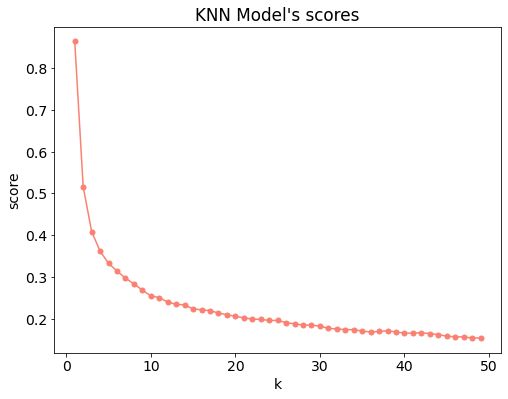

In [38]:
# plot the scores for each k
plt.plot(Ks, scores, color='salmon', marker='o', markersize='5')
plt.title("KNN Model's scores")
plt.xlabel("k")
plt.ylabel("score")
plt.show()

### K-Nearest Neighbors Model Evaluation

The more k value is, the less model's score is. From k over 3, the average accuracy from the training dataset were not better than around 0.35 which was very low. To see other measures for the KNN model, the k value 7 was chosen to train the model again.

In [39]:
KNN_classifier = Pipeline(steps=[('preprocess', ct), ('classify', KNeighborsClassifier(n_neighbors = 7))])
KNN_classifier.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['body_type', 'diet',
                                                   'drinks', 'drugs', 'job',
                                                   'smokes', 'pets',
                                                   'religion_cleaned'])])),
                ('classify', KNeighborsClassifier(n_neighbors=7))])

In [40]:
from sklearn.metrics import classification_report

KNN_y_train_predictions = KNN_classifier.predict(X_train)
print(classification_report(y_train, KNN_y_train_predictions))

              precision    recall  f1-score   support

           0       0.24      0.49      0.32       776
           1       0.27      0.42      0.33       844
           2       0.29      0.39      0.33       931
           3       0.30      0.28      0.29       766
           4       0.33      0.36      0.34       943
           5       0.32      0.29      0.31       925
           6       0.32      0.28      0.30       855
           7       0.30      0.24      0.27       817
           8       0.31      0.20      0.25       844
           9       0.31      0.21      0.25       845
          10       0.35      0.22      0.27       860
          11       0.33      0.19      0.24       935

    accuracy                           0.30     10341
   macro avg       0.31      0.30      0.29     10341
weighted avg       0.31      0.30      0.29     10341



In order to have insight about precision, recall and f1-score for each class, a classification report was createdd. It showed that this KNN model prediction had quite low precision, recall, f1-score for each class at about 30%.

### Training Random Forest Model

In [53]:
# preprocess train data for training again
preprocess_train_data = ct.fit_transform(X_train)

# create a Random Forest model classifier
RF_classifier = RandomForestClassifier()
RF_classifier.fit(preprocess_train_data, y_train)

# predict training labels for training data using RF_classifier
y_train_predictions = RF_classifier.predict(preprocess_train_data)

### Random Forest Model Evaluation

In [54]:
print(classification_report(y_train, y_train_predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       776
           1       0.86      0.86      0.86       844
           2       0.85      0.87      0.86       931
           3       0.90      0.87      0.88       766
           4       0.88      0.85      0.87       943
           5       0.88      0.88      0.88       925
           6       0.85      0.90      0.87       855
           7       0.85      0.86      0.85       817
           8       0.84      0.88      0.86       844
           9       0.89      0.86      0.87       845
          10       0.87      0.86      0.86       860
          11       0.88      0.88      0.88       935

    accuracy                           0.87     10341
   macro avg       0.87      0.87      0.87     10341
weighted avg       0.87      0.87      0.87     10341



Random Forest Model seems to be better with very high f1-score. However, this may happen because of overfitting data, for example, the trees in models may have too many levels of classification. And this model may not able to generalize the classification well.

 ### Tuning Hyperparameters - Max Depth

In [55]:
# check max depth of each tree estimator
tree_max_depths = [estimator.tree_.max_depth for estimator in RF_classifier.estimators_]
print(tree_max_depths)

[53, 50, 57, 58, 59, 55, 54, 54, 59, 60, 54, 53, 59, 51, 54, 51, 55, 50, 56, 57, 55, 51, 51, 67, 50, 51, 48, 49, 52, 54, 57, 56, 50, 59, 51, 53, 59, 57, 54, 54, 50, 51, 58, 52, 61, 51, 54, 55, 59, 59, 53, 56, 56, 60, 53, 50, 48, 53, 53, 50, 57, 60, 58, 56, 52, 57, 47, 61, 52, 58, 46, 65, 54, 54, 62, 53, 53, 51, 57, 58, 52, 51, 59, 56, 65, 62, 50, 57, 53, 59, 63, 51, 49, 62, 50, 57, 59, 61, 52, 56]


Investingating about max depth of each tree in this random forest classifier, the max depth were at about 50-60. Therefore, we train a model again with max_depth equal to 25.

In [57]:
max_depths = range(1, 61)
md_train_scores = []
md_test_scores = []
for depth in max_depths:
    classifier1 = RandomForestClassifier(max_depth = depth)
    classifier1.fit(preprocess_train_data, y_train)
    y_train_predict = classifier1.predict(preprocess_train_data)
    y_test_predict = classifier1.predict(preprocess_test_data)
    md_train_scores.append(f1_score(y_train, y_train_predict, average='macro'))
    md_test_scores.append(f1_score(y_test, y_test_predict, average='macro'))

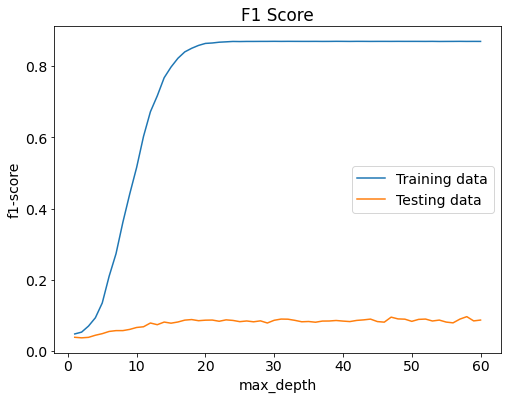

In [58]:
# plot scores graphs
plt.plot(max_depths, md_train_scores, label="Training data")
plt.plot(max_depths, md_test_scores, label="Testing data")
plt.legend()
plt.title("F1 Score")
plt.xlabel("max_depth")
plt.ylabel("f1-score")
plt.show()

As the max depth of trees grew, the prediction's f1 scores for training data leveled off at max depth equal to 20. However, it failed to classify testing data which prediction's scores were around at 0.1. To 

In [59]:
RF_classifier = RandomForestClassifier(max_depth = 20)
RF_classifier.fit(preprocess_train_data, y_train)
y_train_predictions = RF_classifier.predict(preprocess_train_data)
print(classification_report(y_train, y_train_predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       776
           1       0.86      0.85      0.86       844
           2       0.83      0.87      0.85       931
           3       0.93      0.83      0.88       766
           4       0.78      0.90      0.84       943
           5       0.86      0.89      0.87       925
           6       0.90      0.85      0.88       855
           7       0.88      0.83      0.85       817
           8       0.87      0.85      0.86       844
           9       0.85      0.86      0.85       845
          10       0.89      0.85      0.87       860
          11       0.84      0.88      0.86       935

    accuracy                           0.86     10341
   macro avg       0.87      0.86      0.86     10341
weighted avg       0.86      0.86      0.86     10341



To see more in details, the classification report was created. It seems to be good prediction. Then, I evaluated the model using testing data.

In [60]:
preprocess_test_data = ct.transform(X_test)
y_test_predictions = RF_classifier.predict(preprocess_test_data)
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

           0       0.09      0.07      0.08       207
           1       0.12      0.11      0.11       207
           2       0.10      0.13      0.11       217
           3       0.07      0.04      0.05       187
           4       0.09      0.14      0.11       220
           5       0.09      0.08      0.09       239
           6       0.10      0.09      0.09       215
           7       0.09      0.07      0.08       222
           8       0.10      0.09      0.10       192
           9       0.05      0.05      0.05       218
          10       0.10      0.09      0.10       233
          11       0.05      0.07      0.06       229

    accuracy                           0.09      2586
   macro avg       0.09      0.09      0.08      2586
weighted avg       0.09      0.09      0.08      2586



It turned out to be worse than the KNN model and not better than normal guess.

 ### Tuning Hyperparameters - Max Leaf Nodes

In [48]:
# check max leaf nodes of each tree in the classifier
max_terminal_leaves = [estimator.get_n_leaves() for estimator in RF_classifier.estimators_]
print(max_terminal_leaves)

[2958, 1943, 2820, 2119, 3157, 2404, 2682, 2703, 2644, 2711, 2570, 2254, 2682, 2174, 2720, 2289, 2490, 2902, 3340, 2500, 2850, 2394, 2328, 2332, 2351, 2049, 2708, 3394, 2804, 1736, 2675, 2592, 2873, 2209, 2983, 2586, 2064, 2873, 1760, 3043, 2698, 2379, 2984, 2849, 3002, 3058, 1875, 3143, 2181, 2739, 1902, 2166, 2432, 3164, 2679, 2165, 2936, 2959, 1629, 2022, 3405, 3289, 2452, 2408, 2980, 2931, 2967, 2941, 2890, 3037, 2855, 2552, 2682, 3482, 2528, 2339, 2868, 3090, 2643, 2064, 1589, 2844, 2027, 1984, 2988, 2304, 2443, 2694, 2072, 2445, 2730, 2976, 2217, 3399, 2770, 2864, 3162, 2495, 1669, 2030]


In [50]:
from sklearn.metrics import f1_score

# Training the random forest classifier again with different max_leaf_nodes starting from 12
max_nodes = range(12,1000)
train_scores = []
test_scores = []
for n in max_nodes:
    classifier = RandomForestClassifier(max_depth = 25, max_leaf_nodes = n)
    classifier.fit(preprocess_train_data, y_train)
    y_train_predict = classifier.predict(preprocess_train_data)
    y_test_predict = classifier.predict(preprocess_test_data)
    train_scores.append(f1_score(y_train, y_train_predict, average='macro'))
    test_scores.append(f1_score(y_test, y_test_predict, average='macro'))

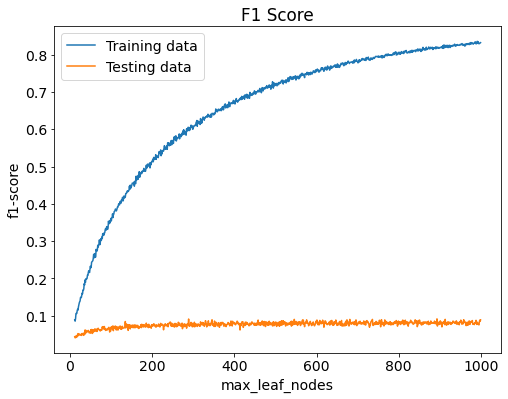

In [51]:
# plot scores graphs
plt.plot(max_nodes, train_scores, label="Training data")
plt.plot(max_nodes, test_scores, label="Testing data")
plt.legend()
plt.title("F1 Score")
plt.xlabel("max_leaf_nodes")
plt.ylabel("f1-score")
plt.show()

Even though the model got higher scores when the max_leaf_nodes increased, the scores for testing data couldn't do better than 0.1. This means that this model is not the proper model for identifying a zodiac sign for a user.

### Tuning Hyperparameters - Min Sample Split

In [62]:
min_samples_splits = range(2, 1000)
mss_train_scores = []
mss_test_scores = []
for n in min_samples_splits:
    classifier2 = RandomForestClassifier(max_depth = 20 , min_samples_split=n)
    classifier2.fit(preprocess_train_data, y_train)
    y_train_predict = classifier2.predict(preprocess_train_data)
    y_test_predict = classifier2.predict(preprocess_test_data)
    mss_train_scores.append(f1_score(y_train, y_train_predict, average='macro'))
    mss_test_scores.append(f1_score(y_test, y_test_predict, average='macro'))

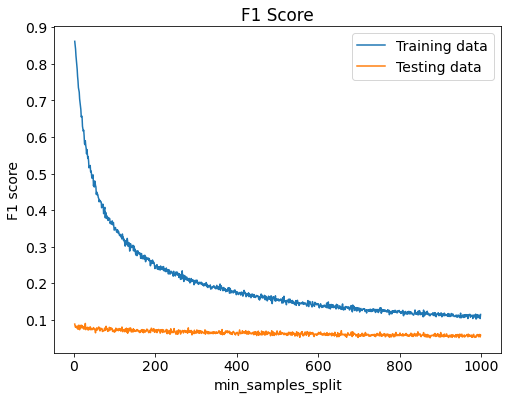

In [63]:
# plot scores graphs
plt.plot(min_samples_splits, mss_train_scores, label="Training data")
plt.plot(min_samples_splits, mss_test_scores, label="Testing data")
plt.legend()
plt.title("F1 Score")
plt.xlabel("min_samples_split")
plt.ylabel("F1 score")
plt.show()

Changing min samples split, it indicated that the scores of training data and testing data will come closer when minimum samples for spliting is about 600. Unfortunately, the f1-scores were also under 0.2. After tuning hyperparameters of random forest classifier, it confirmed that this classiffier is not a good classifier for predicting signs.

### Section 2 - Including Essay Columns Data

As there might be some underlying words that shows how people live or think, including essay columns in the dataset might generate different result.

In [64]:
#import TfidfVectorizer for preprocessing text data
from sklearn.feature_extraction.text import TfidfVectorizer

### Preprocessing data

In [65]:
cols_to_classify2 = ['body_type', 'diet', 'drinks', 'drugs', 'job',  'smokes', 'pets', 'religion_cleaned', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'sign_cleaned']
def create_classify_data2(df, cols_to_classify2):
    data = df[cols_to_classify2]
    
    essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
    # delete all html tags, new line escape, and http links in the essay columns
    filled_df = data.replace({r'<[A-Za-z\/][^>]*>' : '', r'\n' : ' ', r'http[^ ]*[ ]' : ' ', r'http[^ ]*' : ''}, regex=True)
    # fill the essay columns with null values with a space
    filled_df = filled_df.dropna()
    # create the 'combined_essay' column by combining all the essay columns together
    filled_df['combined_essay'] = filled_df[essay_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
              
    return filled_df

In [66]:
new_df = create_classify_data2(df,cols_to_classify2)
new_df.isna().sum()

body_type           0
diet                0
drinks              0
drugs               0
job                 0
smokes              0
pets                0
religion_cleaned    0
essay0              0
essay1              0
essay2              0
essay3              0
essay4              0
essay5              0
essay6              0
essay7              0
essay8              0
essay9              0
sign_cleaned        0
combined_essay      0
dtype: int64

In [67]:
# select only used columns
model_df2 = new_df[['body_type', 'diet', 'drinks', 'drugs', 'job',  'smokes', 'pets', 'religion_cleaned', 'combined_essay', 'sign_cleaned']]

In [68]:
# Prepare X
X2 = model_df2.iloc[:, :-1]

# Prepare Y
encoder = LabelEncoder()
Y2 = encoder.fit_transform(model_df2['sign_cleaned'])

encoder.classes_

array(['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo',
       'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo'],
      dtype=object)

In [69]:
train_data, test_data, train_labels, test_labels = train_test_split(X2, Y2, random_state=0)
ct2 = ColumnTransformer([ 
    ('tfidf', TfidfVectorizer(), 'combined_essay'),
    ('onehot', OneHotEncoder(), ['body_type', 'diet', 'drinks', 'drugs', 'job', 'smokes', 'pets', 'religion_cleaned'])])

### Training KNN Model

In [73]:
scores2 = []
Ks = range(1,50)

for k in Ks:
    clf = Pipeline(steps=[('preprocess', ct2), ('classify', KNeighborsClassifier(n_neighbors = k))])
    clf.fit(train_data, train_labels)
    scores2.append(clf.score(train_data, train_labels))

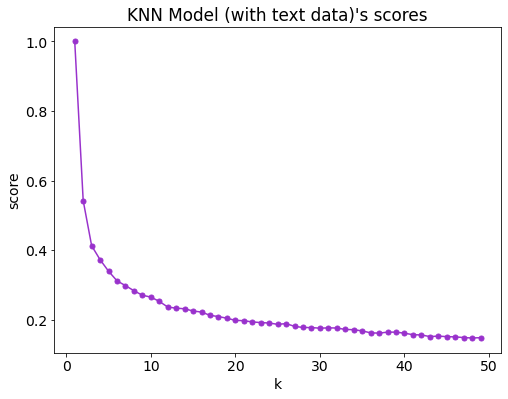

In [74]:
# plot the scores for each k
plt.plot(Ks, scores2, color='darkorchid', marker='o', markersize='5')
plt.title("KNN Model (with text data)'s scores")
plt.xlabel("k")
plt.ylabel("score")
plt.show()

Including essay columns in the dataset and using K-Nearest Neighbors did not change the results much.  The scores still remained low.

### Training with Random Forest Model

In [76]:
# preprocess train data and test data for training again
preprocess_train_data2 = ct2.fit_transform(train_data)
preprocess_test_data2 = ct2.transform(test_data)
# create a Random Forest model classifier
RF_classifier2 = RandomForestClassifier()
RF_classifier2.fit(preprocess_train_data2, train_labels)

# predict training labels for training data using RF_classifier
RF2_train_predictions = RF_classifier2.predict(preprocess_train_data2)

## Random Forest Model Evaluation

In [88]:
print(classification_report(train_labels, RF2_train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       1.00      1.00      1.00       520
           2       1.00      1.00      1.00       551
           3       1.00      1.00      1.00       433
           4       1.00      1.00      1.00       533
           5       1.00      1.00      1.00       539
           6       1.00      1.00      1.00       503
           7       1.00      1.00      1.00       453
           8       1.00      1.00      1.00       483
           9       1.00      1.00      1.00       474
          10       1.00      1.00      1.00       491
          11       1.00      1.00      1.00       535

    accuracy                           1.00      5967
   macro avg       1.00      1.00      1.00      5967
weighted avg       1.00      1.00      1.00      5967



In [89]:
RF2_test_predictions = RF_classifier2.predict(preprocess_test_data2)
print(classification_report(test_labels, RF2_test_predictions))

              precision    recall  f1-score   support

           0       0.13      0.09      0.10       164
           1       0.09      0.14      0.11       168
           2       0.11      0.18      0.14       175
           3       0.09      0.05      0.06       143
           4       0.11      0.15      0.13       163
           5       0.09      0.12      0.10       177
           6       0.10      0.10      0.10       166
           7       0.08      0.05      0.06       152
           8       0.08      0.05      0.06       164
           9       0.09      0.05      0.06       170
          10       0.08      0.06      0.07       171
          11       0.11      0.11      0.11       176

    accuracy                           0.10      1989
   macro avg       0.10      0.10      0.09      1989
weighted avg       0.10      0.10      0.09      1989



# Conclusion
Machine learning models, K-nearest neighbors classifier and random forest classifier cannot predict signs for users very well. K-Nearest Neighbor prediction's rate is at about 30% which is better than the random forest model. The random forest model can predict training data with high f1-scores but it is due to overfitting on training data. For prediction of testing data, random forest model cannot do better than normal guess which is around 8%.


# Future Work
Since the models are based on features provided, to increase the accuracy of prediction user's features should be discussed more. Which data we should collect more from users. Also, the data collected should not contain a lof of null values. With plenty of non-values givened in the features may have effects on classification